### Introduction
In this notebook, I will try to analyze a controversial topic: who is the best/worst NBA player, per draft position? This is a controversial topic because, best/worst player is mainly about opinion and preference, and stats cannot simply justified the best/worst argument as basketball and sports in overall cannot be judged only by stats and number.

Let's get started into it. For you who don't know what a draft is, it is a method for NBA teams to "recruit" new players from colleges or overseas. The recruitment process happened sequentially, so the team that get the first pick can recruit player first, and so on. With such method, it is expected that the first player drafted is the best player from the recruitment class. But sometimes, we got a highly picked player that doesn't meet the expectation or a lowly drafted player that overcome the expectation. Using this dataset, I will try to analyze which player that actually over/underacieved their draft position.

### EDA & Data cleansing
First, let's do some EDA from this dataset. We can start by import useful libraries and load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("all_seasons.csv")
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [3]:
df.shape

(12305, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            10516 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [5]:
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,6152.000000,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,3552.291866,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3076.000000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,6152.000000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,9228.000000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,12304.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


Here we got some descriptive statistics of numerical features. We can see that the dataset contain many single game appearence. While this not really affect many of the essential stats (points, assists, rebounds, etc.), single game appearence really disturb the net rating. For example, the max net rating recorded in the dataset is 300 while the lowest is -200. This is happens because in one of those single game appearence, that player maybe only played in garbage time thus the net rating deflated.

To deal with this, we can use three approaches: drop the record of player who only played few number of games for every season, drop the record of player who only averaged few number of games overall, or simply removed this features from consideration. All of this approaches have their own pros and cons. In the first approach, we can drop some record of a player who actually has a decent career, but has one or two seasons with only one appearances due to injury/rough start. For example, let's see the career of Bruce Bowen:

In [6]:
test_feat = ['gp','net_rating']
df.loc[df.player_name=='Bruce Bowen',test_feat]

,gp,net_rating
163,1,300.0
769,61,0.4
886,30,-3.9
1512,69,3.0
1960,82,3.1
2473,59,11.3
2672,82,8.9
3342,82,8.7
3717,82,9.5
4179,82,8.7


Here we can see that Bruce start his first NBA season by only played one game with deflated net rating of 300, but after that he definitely has a legendary career with the San Antonio Spurs. If we choose the first approach, we will neglect his career start, but we can slightly alter his points per game for example, and can create some bias. If we choose the second approach, we will keep this deflated stats and affect our calculation. The third approach is more neutral, but I want to keep it as it can differentiate good player in good team or bad team.

To decide my approach, I want to know how many records that contain this anomaly:

In [32]:
(df.loc[(df['gp']==1 )& (df['net_rating']>20)])

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
163,163,Bruce Bowen,MIA,26.0,200.66,90.718400,Cal State-Fullerton,USA,Undrafted,Undrafted,...,0.0,0.0,0.0,300.0,0.000,0.000,0.000,0.000,0.000,1996-97
1723,1723,Randell Jackson,DAL,24.0,210.82,97.522280,Florida State,USA,1999,Undrafted,...,0.0,0.0,0.0,60.4,0.000,0.000,0.000,0.000,0.000,1999-00
4805,4805,Von Wafer,LAC,21.0,195.58,95.254320,Florida State,USA,2005,2,...,0.0,0.0,0.0,26.6,0.000,0.000,0.275,0.000,0.000,2006-07
5910,5910,Ryan Bowen,OKC,34.0,205.74,98.883056,Iowa,USA,1998,2,...,4.0,2.0,0.0,69.2,0.111,0.100,0.083,1.064,0.000,2009-10
7698,7698,DeAndre Liggins,MIA,26.0,198.12,94.800728,Kentucky,USA,2011,2,...,2.0,1.0,0.0,33.3,0.500,0.000,0.200,1.000,0.000,2013-14
8251,8251,Malcolm Lee,PHI,25.0,195.58,90.718400,UCLA,USA,2011,2,...,0.0,0.0,0.0,66.7,0.000,0.000,0.192,0.000,0.000,2014-15
9579,9579,Devin Robinson,WAS,23.0,203.20,90.718400,Florida,USA,Undrafted,Undrafted,...,2.0,5.0,0.0,28.6,0.095,0.250,0.083,0.333,0.000,2017-18
9597,9597,Gordon Hayward,BOS,28.0,203.20,102.511792,Butler,USA,2010,1,...,2.0,1.0,0.0,27.3,0.000,0.200,0.154,0.500,0.000,2017-18
9801,9801,Anthony Brown,MIN,25.0,200.66,101.604608,Stanford,USA,2015,2,...,3.0,0.0,1.0,30.0,0.000,0.000,0.100,1.500,0.333,2017-18
9946,9946,Naz Mitrou-Long,UTA,24.0,193.04,98.883056,Iowa State,Canada,Undrafted,Undrafted,...,3.0,0.0,0.0,250.0,0.000,0.000,0.500,1.500,0.000,2017-18


It seems like there are many similar cases in the dataset. Therefore, my approach is to discard player who average less than 3 games for their entire career when we rank the players.

Then as we want to measure per draft number, we want to know how many draft class are there in the dataset

In [7]:
df.draft_year.unique()

array(['1986', '1990', '1979', '1995', '1985', '1981', '1994', '1992',
       '1991', 'Undrafted', '1983', '1988', '1996', '1993', '1989',
       '1987', '1982', '1984', '1980', '1976', '1978', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '1963', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype=object)

So, per 1996 season, there are 44 draft class and 1 class for undrafted player. In the case for undrafted player, we want to see whether majority of NBA players are undrafted. Since 1990, NBA draft consist of two rounds with 29 or 30 picks per round. thus around 60 new players become NBA player each season. If each team need 15-man roster for their team, for 30 NBA team around 450 players needed, which can be acquired from free agency of undrafted player. For some perspective, let's see 2018 season

<Axes: xlabel='count', ylabel='draft_year'>

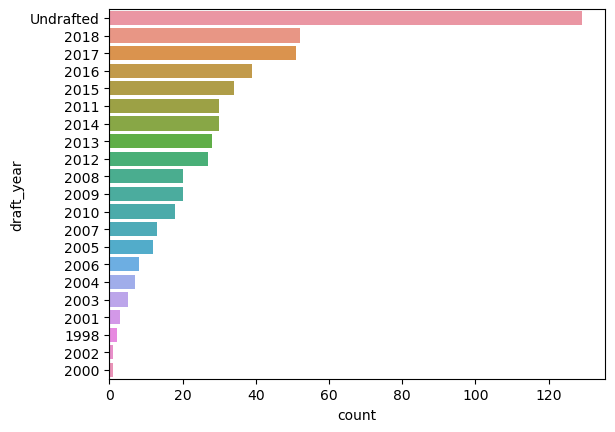

In [8]:
sns.barplot(y=df.loc[df.season=='2018-19'].draft_year.value_counts().index,x=df.loc[df.season=='2018-19'].draft_year.value_counts())

In [9]:
total_player = len(df.loc[df.season=='2018-19'].player_name.unique())
undrafted_player = len(df.loc[(df.season=='2018-19')&(df.draft_year=='Undrafted')].player_name.unique())
prcntg  = 100*(undrafted_player/total_player)
print(prcntg)

24.339622641509433


We can see that more than 24% of NBA players actually come undrafted per 2018 season.

This dataset contains all of player records from 1996 season. We can't include all players in this list, as some of them maybe drafted far back beyond 1996 season, thus the record in this dataset does not count all of their accomplishment. For example, we only got around 5 season of Michael Jordan greatness with this dataset. Because of that, we need to discard players that drafted before 1996 season.

In [10]:
df.drop(df[df.draft_year<"1996"].index,inplace=True)

We also need to clean some weird number, such as a player that drafted in 82nd pick, and turn all of undrafted player to 61st pick for analytics purpose.

In [11]:
df['draft_number'].replace('Undrafted','82',inplace=True)
df['draft_number'].replace('82','61',inplace=True)
df['draft_number']  = pd.to_numeric(df["draft_number"])

Then we want to discard some players that only played few games for their entire career. First we need to list them then drop them from the original dataframe

In [12]:
df_player = df[['player_name', 'gp']].groupby('player_name').sum().reset_index()
df_player = df_player.loc[df_player['gp'] < 5]
for p in df_player['player_name']:
    df.drop(df[df.player_name==p].index, inplace=True)

Next, we create two dataframe: average stats per draft pick and average stats per player. Average stats per draft pick means the average stats for each draft pick. For stat, we will used 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'.

In [13]:
stats = ['gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
avg_per_pick = df.groupby(['draft_number'])[stats].mean().reset_index()
avg_per_player = df.groupby(['player_name','draft_number'])[stats].mean().reset_index()

First, let's see the trend of traditional stats (points, assists, rebounds) against the draft position.

<Axes: xlabel='draft_number', ylabel='pts'>

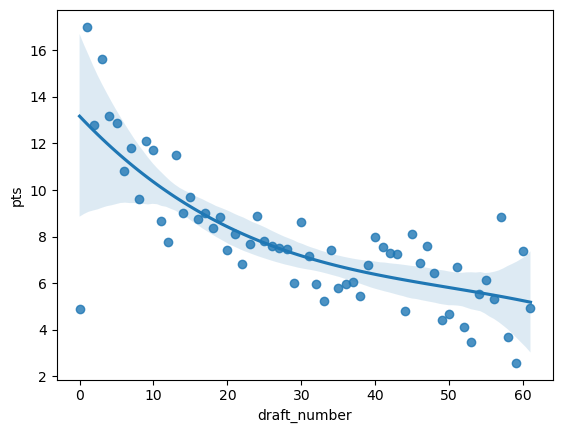

In [14]:
sns.regplot(x = 'draft_number', y = 'pts', data=avg_per_pick,order = 3)

<Axes: xlabel='draft_number', ylabel='ast'>

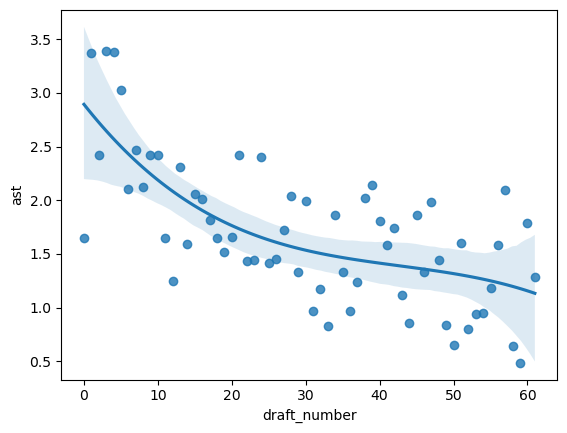

In [15]:
sns.regplot(x= 'draft_number', y = 'ast', data=avg_per_pick, order=3)

<Axes: xlabel='draft_number', ylabel='reb'>

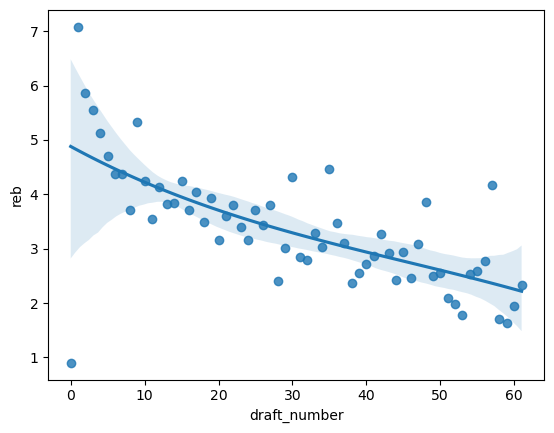

In [16]:
sns.regplot(x='draft_number', y = 'reb', data=avg_per_pick, order=3)


It's seems that the overall trend shows that higher draft pick gives better number. But let's see the the actual number as we can see many outliers in the graph

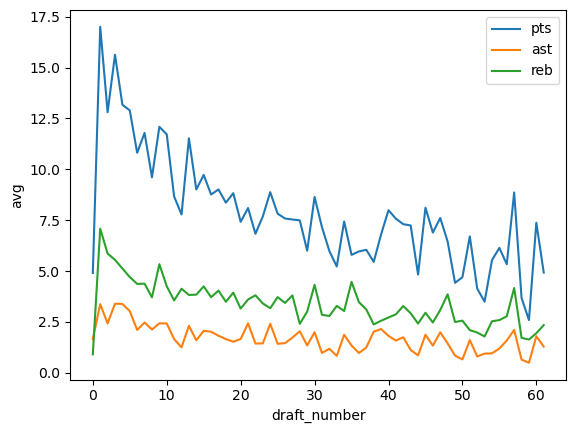

In [17]:
ax = sns.lineplot(x='draft_number',y='pts',data=avg_per_pick, label='pts')
ax = sns.lineplot(x='draft_number',y='ast',data=avg_per_pick, label='ast')
ax = sns.lineplot(x='draft_number',y='reb',data=avg_per_pick, label='reb')
ax.set(ylabel = 'avg')
ax.legend()


In [18]:
avg_per_pick[['draft_number','pts','reb','ast']][:15]

,draft_number,pts,reb,ast
0,0,4.900000,0.900000,1.650000
1,1,17.010359,7.082470,3.370120
2,2,12.808772,5.855702,2.421930
3,3,15.636290,5.548387,3.392742
4,4,13.177419,5.124597,3.378629
5,5,12.897628,4.701581,3.027273
6,6,10.813812,4.364641,2.101105
7,7,11.790244,4.376423,2.467073
8,8,9.606637,3.702212,2.121681
9,9,12.090496,5.334711,2.424380


In [19]:
avg_per_pick[['draft_number','pts','reb','ast']][-5:]

,draft_number,pts,reb,ast
57,57,8.862500,4.162500,2.097500
58,58,3.679310,1.710345,0.641379
59,59,2.585714,1.628571,0.485714
60,60,7.375000,1.940625,1.790625
61,61,4.922915,2.336832,1.283037


We can see some interesting trend here. For example, we can see that the 2nd overall pick actually has lowest ppg and apg among the top 5 picks. Well, historically not many successful 2nd pick since 1995 with some notable names are Derrick Williams, Hasheem Thabeet, and Darko Milicic, which are considered as the draft bust. Then we got 11th pick, which notoriously has lowest ppg, apg, and rpg among lottery pick and even to late round pick. Sure Klay Thompson, Myles Turner, and Domantas Sabonis were picked at this position, but other than that we only got some decent NBA players.

We also got interesting things in the late draft pick, where there are some spike in 57th and 60th pick. Let's see some details about players in this position

In [20]:
avg_per_player[avg_per_player.draft_number==57]

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
340,Corsley Edwards,57,10.000000,2.700000,2.500000,0.300000,-14.600000,0.112000,0.149000,0.166000,0.372000,0.057000
541,Drew Barry,57,20.000000,2.300000,1.100000,1.866667,2.266667,0.014667,0.100000,0.125333,0.570667,0.275000
970,Jordan Bone,57,12.000000,2.600000,1.050000,1.050000,-8.600000,0.009000,0.096500,0.146000,0.409500,0.189000
1087,Kevin Hervey,57,10.000000,1.700000,1.200000,0.500000,-28.900000,0.012000,0.216000,0.189000,0.315000,0.192000
1231,Manu Ginobili,57,66.062500,13.150000,3.481250,3.781250,10.225000,0.029312,0.127000,0.236563,0.580875,0.238312
1236,Marcin Gortat,57,67.166667,9.183333,7.458333,1.058333,0.816667,0.105167,0.247917,0.169500,0.566250,0.067167
1560,Reggie Perry,57,18.000000,6.100000,3.750000,0.850000,-11.950000,0.095500,0.184500,0.206000,0.501500,0.107500
1632,Ryan Reid,57,5.000000,1.600000,0.400000,0.000000,15.000000,0.071000,0.077000,0.163000,0.800000,0.000000
1810,Torraye Braggs,57,11.000000,1.800000,2.150000,0.250000,-5.750000,0.262500,0.227000,0.183000,0.475500,0.041500


In [21]:
avg_per_player[avg_per_player.draft_number==60]

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
42,Alex Acker,60,15.000000,2.350000,1.000000,0.650000,-21.300000,0.039000,0.115000,0.215500,0.364500,0.140500
343,Cory Jefferson,60,29.000000,3.250000,2.450000,0.150000,-1.700000,0.111500,0.198000,0.191500,0.463000,0.023500
645,Georgios Kalaitzakis,60,13.000000,6.600000,1.600000,0.900000,-29.300000,0.026000,0.074000,0.200000,0.536000,0.090000
732,Isaiah Thomas,60,50.000000,14.981818,2.090909,4.027273,-1.000000,0.019000,0.067636,0.263000,0.535727,0.245818
1121,Kostas Antetokounmpo,60,7.333333,1.066667,0.800000,0.166667,19.766667,0.051333,0.124000,0.169333,0.498000,0.041000
1580,Robert Sacre,60,47.250000,3.700000,2.850000,0.600000,-6.800000,0.076500,0.147750,0.144250,0.460750,0.066250
1642,Sam Merrill,60,18.000000,3.600000,1.100000,0.700000,-9.800000,0.018000,0.100500,0.162000,0.544000,0.121500
1671,Semih Erden,60,34.500000,3.750000,2.750000,0.400000,-6.400000,0.074500,0.183000,0.142500,0.565500,0.051500
1867,Tyrone Wallace,60,28.000000,4.725000,2.000000,1.050000,-4.000000,0.017500,0.114500,0.154250,0.434750,0.086250
1913,Will Blalock,60,14.000000,1.800000,1.100000,1.200000,-6.700000,0.038000,0.066000,0.120000,0.383000,0.193000


So, we can see two names that create this spike: Manu Ginobili and Isaiah Thomas. IT create the spike in ppg due to his inprobable all-star form in Boston Celtics and Manu just being Manu. Seeing the downhill of IT is a sad story though

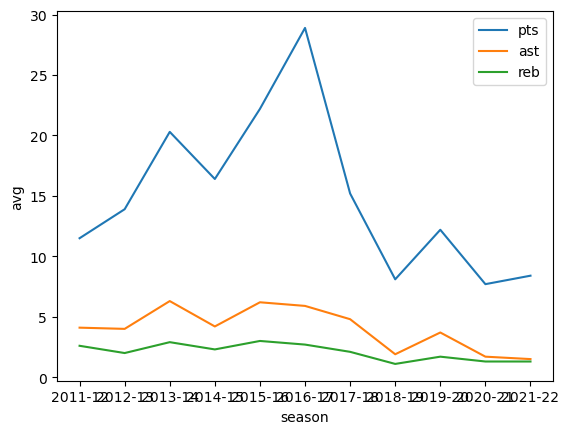

In [22]:
ax = sns.lineplot(x='season',y='pts',data=df.loc[df['player_name'] == 'Isaiah Thomas'], label='pts')
ax = sns.lineplot(x='season',y='ast',data=df.loc[df['player_name'] == 'Isaiah Thomas'], label='ast')
ax = sns.lineplot(x='season',y='reb',data=df.loc[df['player_name'] == 'Isaiah Thomas'], label='reb')
ax.set(ylabel = 'avg')
ax.legend()
plt.show()

Although his apg and rpg basically stays the same, his ppg drop significantly from almost 30.0 ppg to mere 10.0 ppg since his trade to Cavs and hip injury.


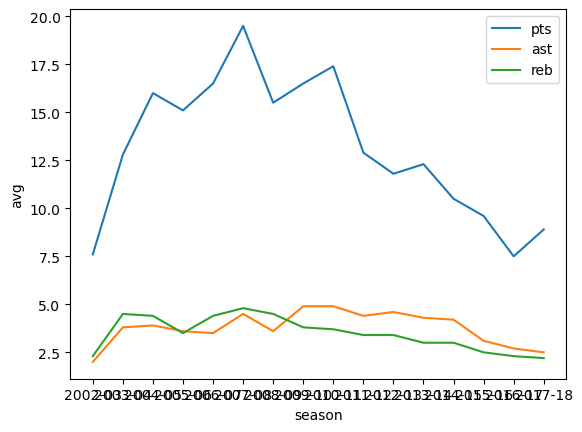

In [23]:
ax = sns.lineplot(x='season',y='pts',data=df.loc[df['player_name'] == 'Manu Ginobili'], label='pts')
ax = sns.lineplot(x='season',y='ast',data=df.loc[df['player_name'] == 'Manu Ginobili'], label='ast')
ax = sns.lineplot(x='season',y='reb',data=df.loc[df['player_name'] == 'Manu Ginobili'], label='reb')
ax.set(ylabel = 'avg')
ax.legend()
plt.show()

Manu's stat actually looks like a decent player with some all star number in his prime, given the facts that he was picked 57th in the draft.

## Rank the best player for each pick
Now we move to the tricky part: rank the best/worst player. Obviously we cannot use traditional stats only to make our consideration. We must use all the stats available to rank the players. How do we do it?

I create a metrics called 'score', which measure the difference between sum of player's stat with the average stat in his draft position. Sounds simple right? I create this metrics based on the facts that in basketball stat that we analyzed, the higher the number, the better the player was. In other hands, if the difference of sum of player stats to the sum of average stat is equal/approaching zero, the player is an average player in his draft position. if the difference is positive, he is overachieving and vice versa. First let's create the function to measure the 'score'.

In [24]:
def score(a, b):
    #function to calculate score
    sum = 0.0
    for i in range(1,len(a)):
        sum += (b[i+1]-a[i])
    return (sum)

Then we applied it to our dataset

In [25]:
dist = []
for p in range(avg_per_player.shape[0]):
    index_value = avg_per_player.loc[p][1]
    
    if index_value >= 1:  # Avoid negative or zero indices
        val = score(avg_per_pick.loc[index_value - 1], avg_per_player.loc[p])
        dist.append(val)
    else:
        dist.append(None)  # Handle invalid cases
    
avg_per_player['score'] = dist


Let's see the score for example 1st draft pick

In [26]:
avg_per_player.loc[avg_per_player.draft_number==1].sort_values('score')

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
99,Anthony Bennett,1,37.750000,3.975000,2.850000,0.400000,-11.425000,0.076750,0.228750,0.186500,0.465500,0.051250,18.110250
1268,Markelle Fultz,1,26.200000,10.220000,3.180000,4.580000,-1.820000,0.029200,0.100800,0.226400,0.472000,0.304000,27.043900
674,Greg Oden,1,35.000000,7.633333,5.933333,0.466667,3.000000,0.147333,0.232000,0.184667,0.604333,0.037000,36.790167
1127,Kwame Brown,1,50.583333,6.166667,5.316667,0.875000,-3.941667,0.094250,0.208000,0.155083,0.511833,0.066000,43.586667
1331,Michael Olowokandi,1,55.555556,7.744444,6.444444,0.655556,-4.911111,0.082667,0.210000,0.182556,0.453556,0.042444,50.011611
81,Andrea Bargnani,1,55.000000,14.270000,4.530000,1.230000,-5.720000,0.039200,0.149200,0.243100,0.524200,0.073800,53.891000
1079,Kenyon Martin,1,50.466667,10.726667,6.513333,1.606667,2.906667,0.069667,0.187800,0.183867,0.505533,0.090067,56.808433
85,Andrew Bogut,1,50.428571,8.600000,8.192857,2.035714,3.071429,0.099500,0.254786,0.158071,0.548571,0.120786,57.061786
483,Derrick Rose,1,51.692308,17.200000,3.146154,5.061538,0.800000,0.027077,0.079846,0.271154,0.522154,0.279846,62.631577
1952,Zion Williamson,1,42.500000,24.750000,6.750000,2.900000,3.600000,0.086500,0.122500,0.289000,0.632500,0.153500,65.335500


As we can see, LeBron actually is the best 1st pick since 1995, whatever the haters say, and Anthony Bennett is truly the biggest bust for a 1st pick. Zion get negative score as this is still his first season. We also see that the number of games played affected the metric. Kyrie, who actually has great stats has lower score than John Wall and Andrew Wiggins as he played less game per season. Net rating, as I mentioned earlier, gives difference between star in bad team and good team. Tim Duncan has similar stats with Karl-Anthony Towns, but as he has superior net rating, he has higher metric in the end. Now let's see which player has the highest score per draft position

In [27]:
max_score_indices = avg_per_player.groupby('draft_number')['score'].idxmax()

max_score_indices = max_score_indices.dropna()

avg_per_player.loc[max_score_indices]

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
1166,LeBron James,1,71.894737,27.110526,7.500000,7.368421,6.700000,0.035053,0.183474,0.312947,0.589684,0.352000,105.598342
1086,Kevin Durant,2,67.071429,27.100000,7.100000,4.392857,6.350000,0.021143,0.178786,0.297643,0.619500,0.202500,23.224367
800,James Harden,3,72.461538,24.853846,5.700000,6.930769,5.653846,0.024846,0.146231,0.293385,0.608077,0.325385,35.597945
1622,Russell Westbrook,4,72.928571,22.950000,7.407143,8.392857,4.178571,0.050857,0.166929,0.314857,0.525643,0.397929,26.449865
1815,Trae Young,5,70.000000,25.600000,3.900000,9.125000,-0.925000,0.018750,0.093000,0.317250,0.581500,0.420250,25.382827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,Manu Ginobili,57,66.062500,13.150000,3.481250,3.781250,10.225000,0.029312,0.127000,0.236563,0.580875,0.238312,45.192802
896,Jericho Sims,58,41.000000,2.200000,4.100000,0.500000,6.500000,0.108000,0.187000,0.068000,0.674000,0.054000,-14.101050
358,DJ Strawberry,59,33.000000,2.200000,0.800000,0.900000,-3.200000,0.034000,0.073000,0.189000,0.364000,0.165000,3.052034
732,Isaiah Thomas,60,50.000000,14.981818,2.090909,4.027273,-1.000000,0.019000,0.067636,0.263000,0.535727,0.245818,70.355753


In [28]:
avg_per_player.loc[avg_per_player.draft_number==8].sort_values('score')

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
916,Joe Alexander,8,33.500000,2.600000,1.250000,0.500000,-13.800000,0.068500,0.122500,0.151500,0.383500,0.092500,-54.906992
1277,Marquese Chriss,8,48.666667,6.900000,4.783333,0.966667,-14.733333,0.072667,0.229000,0.201167,0.504500,0.105000,-32.079825
452,DeSagana Diop,8,50.083333,1.691667,3.158333,0.458333,-3.841667,0.102833,0.181667,0.102167,0.407417,0.062333,-27.369075
1528,Rafael Araujo,8,46.333333,2.733333,2.766667,0.333333,-0.700000,0.091000,0.218000,0.157667,0.446667,0.045667,-27.349825
180,Brandan Wright,8,42.800000,6.660000,3.500000,0.440000,-0.350000,0.091500,0.153700,0.166500,0.617300,0.047400,-25.649092
618,Frank Ntilikina,8,53.800000,4.940000,1.740000,2.160000,-2.780000,0.017200,0.082400,0.156000,0.475200,0.171600,-19.013092
975,Jordan Hill,8,51.125000,6.837500,5.250000,0.637500,-2.612500,0.139250,0.207375,0.192125,0.517875,0.055500,-17.425867
191,Brandon Knight,8,50.111111,12.455556,2.744444,3.511111,-6.977778,0.016111,0.096889,0.231333,0.517778,0.215889,-16.853047
1427,Nik Stauskas,8,57.166667,5.833333,1.733333,1.283333,-3.616667,0.013667,0.089667,0.164167,0.529667,0.107167,-16.471159
20,Adonal Foyle,8,61.083333,3.783333,4.475000,0.441667,-4.400000,0.110333,0.189083,0.125250,0.495917,0.041667,-13.429909


Here's the complete list of best player for each draft pick, measured by the 'score' metrics. We'll see some of great players that we expect is the best on his draft position. Now I want to mention some interesting results.

First, the 'OKC trio' actually was the best 2nd, 3rd, and 4th draft pick since 1995 and all of them have become league MVP. With the addition of Steven Adams (12th pick) and Serge Ibaka (24th pick), OKC drafted 5 players that become the best in their pick (CMIIW). OKC scouts really have good eyes on sleeper player.
GSW drafted 3 players (Steph, Klay, and Draymond) that are the best in their respective draft pick position.
As we expect, Bruce Bowen has the highest 'score' due to his inflated net rating. If we not consider him, Nikola Jokic has the highest 'score', thus the most overachieve player since 1995.
The 59th pick does not give any sleeper players so far. The best of 59th pick is DJ Strawberry with a score of 7.6.
In the case of 8th pick, the best player is Andre Miller. Among the top 10 pick, only 8th pick that actually has a non all-star player as their best player. But it is reasonable as beside Miller, other notable players are KCP, Rudy Gay, and Jamal Crawford.

In [29]:
avg_per_player.loc[avg_per_player.draft_number==13].sort_values('score')

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
646,Georgios Papagiannis,13,19.500000,3.850000,3.050000,0.700000,-4.950000,0.095000,0.199500,0.169500,0.501000,0.091000,-47.386363
1245,Marcus Haislip,13,22.250000,3.300000,1.450000,0.150000,-3.075000,0.076250,0.116750,0.216750,0.481250,0.029000,-45.597363
1663,Sean May,13,29.750000,6.825000,4.050000,0.950000,-4.550000,0.092000,0.199500,0.224000,0.488000,0.098750,-32.465113
905,Jerome Robinson,13,37.666667,4.466667,1.800000,1.166667,-5.833333,0.010667,0.108000,0.158333,0.455667,0.105667,-30.487363
1109,Kira Lewis Jr.,13,39.000000,6.150000,1.450000,2.150000,-6.650000,0.017500,0.073500,0.192500,0.471500,0.215000,-27.522363
1070,Kendall Marshall,13,40.000000,4.725000,1.425000,4.325000,-6.400000,0.007000,0.075750,0.160000,0.490000,0.324750,-25.459863
1238,Marcus Banks,13,43.500000,5.187500,1.212500,1.800000,-3.950000,0.015750,0.084500,0.194000,0.528500,0.219250,-21.800363
194,Brandon Rush,13,53.444444,6.088889,2.433333,0.933333,-3.855556,0.016778,0.118556,0.146333,0.513444,0.077444,-10.675363
1667,Sebastian Telfair,13,56.400000,7.360000,1.600000,3.380000,-7.490000,0.014300,0.076400,0.199500,0.480100,0.269800,-8.302263
1017,Julian Wright,13,57.750000,3.925000,2.325000,0.800000,0.875000,0.072000,0.134500,0.157750,0.525750,0.092500,-3.934863


One of questionable result: where is Kobe Bryant? Instead of Kobe, the best player in 13th pick is Donovan Mitchell. This is happened most likely because: Mitchell average more games per season and has higher net rating than Kobe. In his old days, Kobe suffer many harsh injuries and mediocre teammate that affect his total stats

In [30]:
min_score_indices = avg_per_player.groupby('draft_number')['score'].idxmin()

min_score_indices = min_score_indices.dropna()

avg_per_player.loc[min_score_indices][:15]


,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
99,Anthony Bennett,1,37.750000,3.975000,2.850000,0.400000,-11.425000,0.076750,0.228750,0.186500,0.465500,0.051250,18.110250
691,Hasheem Thabeet,2,44.800000,1.920000,2.400000,0.100000,-7.340000,0.096600,0.188400,0.103400,0.565000,0.012400,-47.263690
768,Jahlil Okafor,3,41.166667,9.550000,4.350000,0.866667,-13.250000,0.077500,0.168333,0.217333,0.592500,0.084333,-37.576645
568,Eddy Curry,4,47.909091,9.663636,3.963636,0.363636,-14.618182,0.077182,0.162182,0.237364,0.566455,0.028455,-42.510037
961,Jonathan Bender,5,32.750000,5.225000,2.025000,0.612500,-6.950000,0.041625,0.145125,0.220250,0.536000,0.093500,-49.048923
366,Dajuan Wagner,6,25.750000,6.975000,0.800000,1.550000,-4.800000,0.007250,0.038500,0.243000,0.589250,0.180000,-52.439490
1106,Killian Hayes,7,46.000000,6.850000,2.950000,4.750000,-10.200000,0.014500,0.100000,0.169500,0.441500,0.271000,-24.926528
916,Joe Alexander,8,33.500000,2.600000,1.250000,0.500000,-13.800000,0.068500,0.122500,0.151500,0.383500,0.092500,-54.906992
1479,Patrick O'Bryant,9,22.500000,1.925000,1.300000,0.300000,-7.175000,0.075000,0.193500,0.181250,0.509250,0.066750,-54.917365
1383,Mouhamed Sene,10,15.666667,2.500000,1.700000,0.033333,-8.966667,0.132000,0.219000,0.210000,0.550333,0.009333,-68.983483


Ok, now what about the underachiever? In this regard, let limit it to the lottery picks as we expect a great player drafted in that position.

In [31]:
avg_per_player.loc[avg_per_player.draft_number==7].sort_values('score')

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
1106,Killian Hayes,7,46.000000,6.850000,2.950000,4.750000,-10.200000,0.014500,0.100000,0.169500,0.441500,0.271000,-24.926528
583,Emmanuel Mudiay,7,50.333333,9.333333,2.433333,3.433333,-9.200000,0.016500,0.089500,0.227667,0.477833,0.297000,-18.831194
309,Chris Mihm,7,54.500000,6.637500,4.750000,0.537500,-5.375000,0.119875,0.183500,0.196500,0.483625,0.061250,-14.178278
565,Eddie Griffin,7,60.600000,6.180000,5.140000,0.700000,-9.060000,0.085800,0.210400,0.178600,0.419400,0.063000,-11.755828
279,Charlie Villanueva,7,59.636364,9.590909,4.300000,0.763636,-7.272727,0.057636,0.202909,0.240000,0.510818,0.067000,-8.176482
1907,Wendell Carter Jr.,7,50.750000,11.950000,8.775000,1.925000,-6.225000,0.085500,0.223250,0.187000,0.574500,0.111500,-7.916278
149,Ben McLemore,7,61.777778,8.466667,2.133333,0.911111,-4.822222,0.018889,0.089333,0.182000,0.542778,0.065333,-6.908028
1184,Lorenzen Wright,7,59.846154,7.253846,5.946154,0.730769,-3.769231,0.099154,0.200538,0.165615,0.468846,0.053923,-5.277258
157,Bismack Biyombo,7,67.090909,5.227273,5.936364,0.600000,-6.090909,0.104636,0.217091,0.128909,0.560545,0.049455,-2.448755
1409,Nene,7,56.764706,10.129412,5.511765,1.617647,-1.282353,0.073294,0.175941,0.212235,0.540706,0.103765,-2.425910


## Conclusion
We have see the best/worst NBA player per their draft position and analyze why the results happened. Well it is not the most objective results, as we use many assumption for our analysis. We also only use a simple metric to rank the players. For the future, I want to use more advanced machine learning method to classify players 'tier', which also become one of the most debatable topic among NBA fans. I welcome any suggestion about my method/analysis. Cheers!